# Importing Relevant Packages

All code cells must be run in sequence.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
import waterfall_chart

In [2]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# Dropping Irrelevant Columns

In [4]:
df.drop(inplace = True, columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# 2. Assumption of Model

In [5]:
interest = 0.1949
transaction_factor = 0.024 
revolving = df.loc[:,'Total_Revolving_Bal']
transaction_amt = df.loc[:, 'Total_Trans_Amt']

Profit = revolving * interest + transaction_factor * transaction_amt
df['Profit'] = Profit

Revolving_Profit_Proportion = revolving * interest / Profit
df['Revolving_Profit_Proportion'] =  Revolving_Profit_Proportion

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Profit,Revolving_Profit_Proportion
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,178.8933,0.846523
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,199.3776,0.844596
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,45.2880,0.000000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,518.6673,0.945815
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,19.5840,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,732.1839,0.492718
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,636.3874,0.669484
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,246.9840,0.000000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,201.4800,0.000000


# 3. Customer Analysis

## 3.1 Initial Exploratory Analysis on Attrition Rate

The pie chart below shows the proportion of existing and attrited customers.

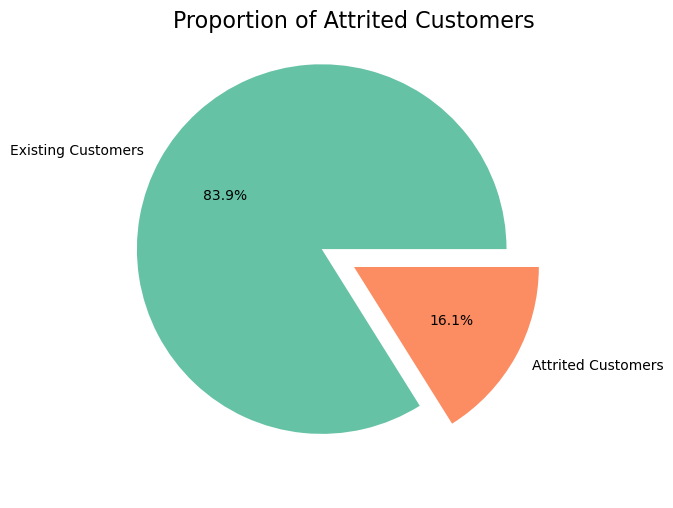

In [6]:
f,axes = plt.subplots(1, 1, figsize=(10, 6))
data = [1 - 0.161, 0.161]
labels = ['Existing Customers', 'Attrited Customers']
explode=(1, 0)
colors = sns.color_palette('Set2')

a = plt.pie(data, labels=labels, colors=colors, explode=(0.2, 0), autopct='%.1f%%')
plt.title('Proportion of Attrited Customers', fontsize =16)
plt.show()

The violin plots and box plots below show the densities and the five value summaries of existing and attrited customers based on Total Relationship Count, Months Inactive, Total Transaction Amount, Total Transaction Count, Total Transaction Count Change and Average Ultilisation Ratio.

In [7]:
variables1 = ['Total_Relationship_Count','Months_Inactive_12_mon', 'Total_Trans_Amt', 
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

titles1 = ['Total Relationship Count','Number of Months Inactive', 'Total Transaction Amt', 
             'Total Transaction Count', 'Total Transaction Count Change', 'Average Utilisation Ratio']

In [8]:
sns.set_theme()

f,axes = plt.subplots(3, 2, figsize=(14,19))
row = 0
col = 0
for i in range(0, len(variables1)):
    
    sns.violinplot(x='Attrition_Flag', y=variables1[i], ax=axes[row][col],
                   palette='Set2', data=df, fliersize=1.5)
    dist_graph = sns.boxplot(x='Attrition_Flag', y=variables1[i], ax=axes[row][col], 
                              width=0.1, palette='Set3', data=df, fliersize=1.5, boxprops={'zorder': 1})
    dist_graph.set_title(titles1[i], fontsize=15)
    dist_graph.set_xlabel('Attrition Flag', fontsize=14)
    dist_graph.set_ylabel(titles1[i], fontsize=14)
    
    if col == 0:
        col = 1
    else:
        col = 0
        row += 1   

# 

## 3.2 Further Exploration and Visualisation on Attrition Rate

In [9]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha='center') 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### 3.2.1 Total Relationship Count

The bar plot below shows the distribution of existing and attrited customers based on Total Relationship Count.

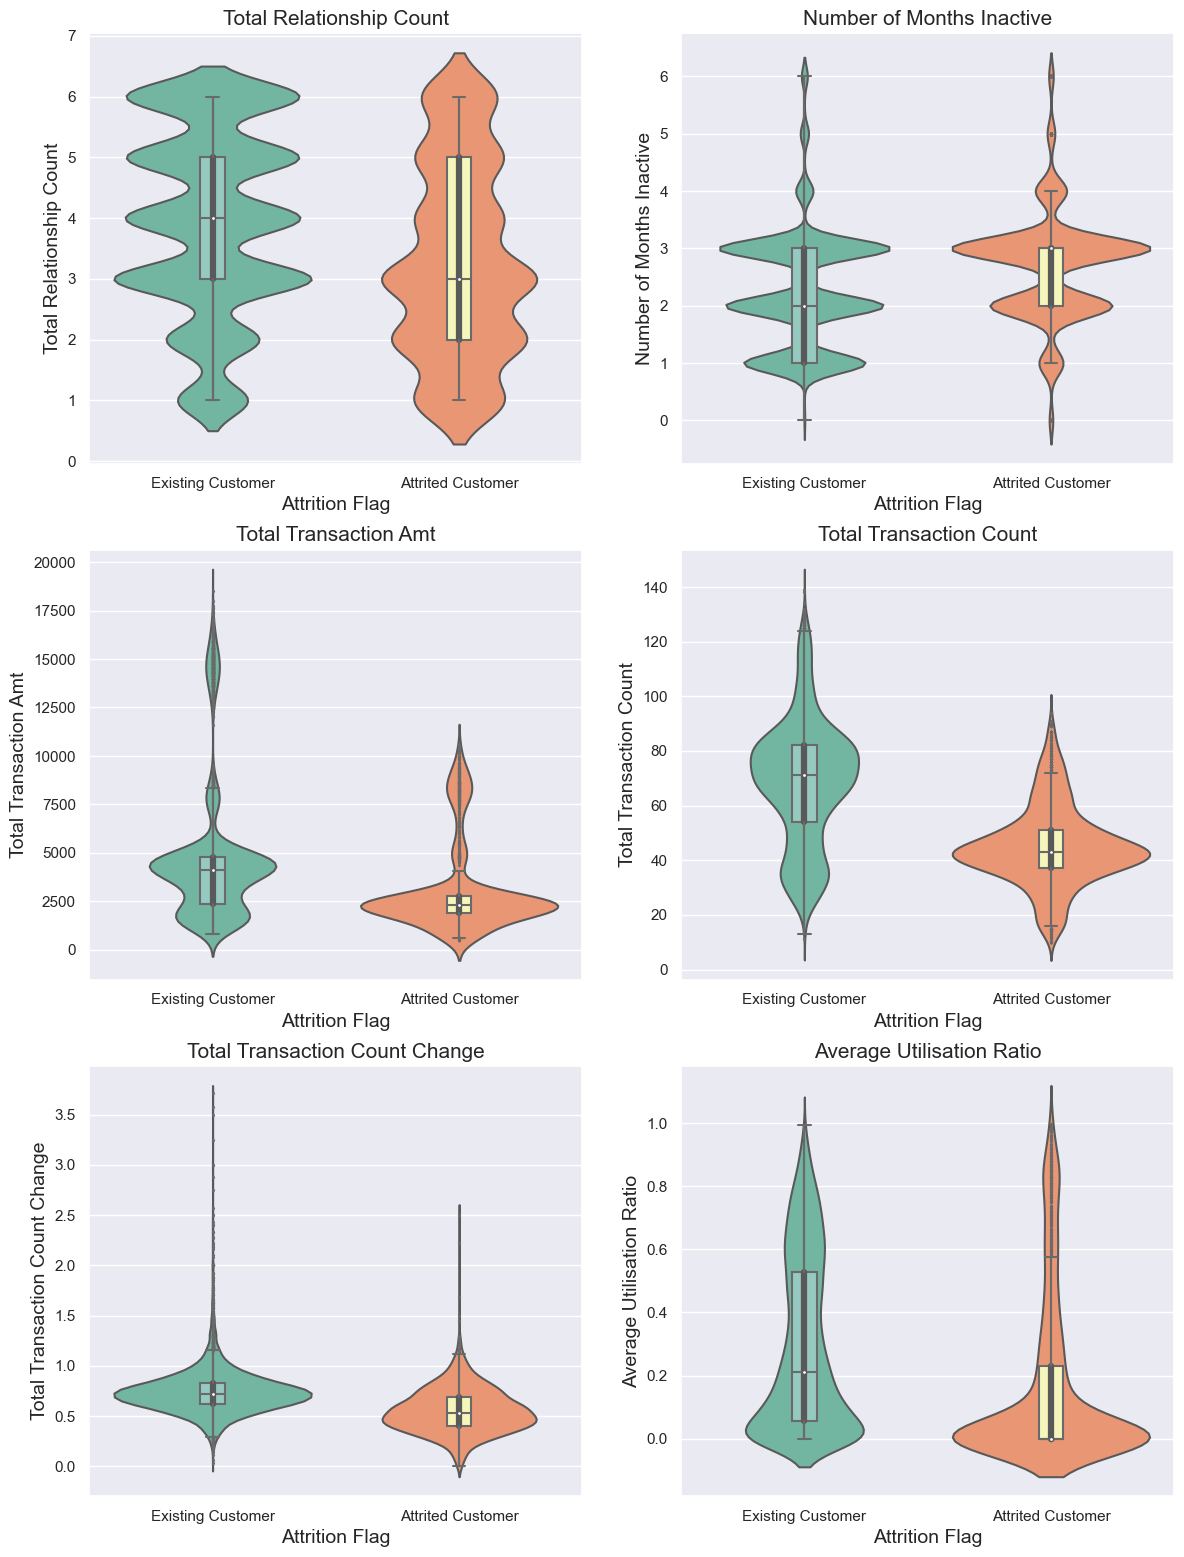

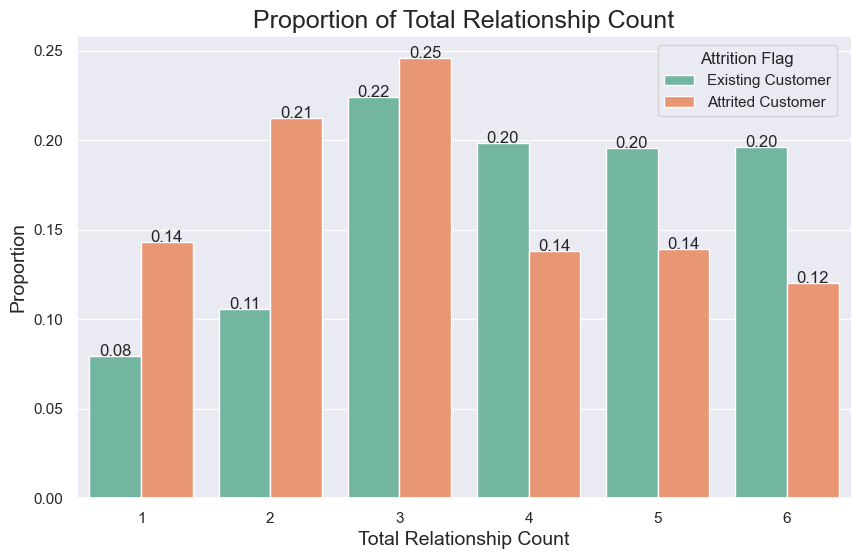

In [10]:
f,axes = plt.subplots(1, 1, figsize=(10,6))
x, y, hue = 'Total_Relationship_Count' , 'Proportion', 'Attrition_Flag'
hue_order = ['Existing Customer', 'Attrited Customer']

graph1 = (df[x]
         .groupby(df[hue])
         .value_counts(normalize=True)
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, 
               palette='Set2', hue_order=hue_order))

graph1.legend(bbox_to_anchor=(0.75, 0.98), loc=2, 
              borderaxespad=0.).set_title('Attrition Flag')
graph1.set_title('Proportion of Total Relationship Count', fontsize=18)
graph1.set_xlabel('Total Relationship Count', fontsize=14)
graph1.set_ylabel('Proportion', fontsize=14)

show_values_on_bars(graph1)

plt.show()

### 3.2.2 Number of Months Inactive

The bar plot below shows the distribution of existing and attrited customers based on Number of Months Inactive.

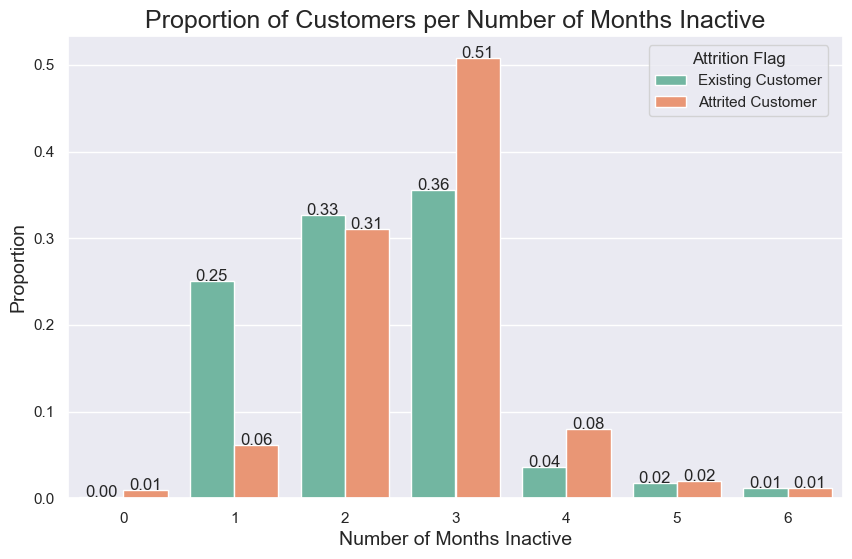

In [11]:
f,axes = plt.subplots(1, 1, figsize=(10,6))
x, y, hue = 'Months_Inactive_12_mon' , 'Proportion', 'Attrition_Flag'
hue_order = ['Existing Customer', 'Attrited Customer']

graph2 = (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, 
           palette='Set2', hue_order=hue_order))

graph2.legend(bbox_to_anchor=(0.75, 0.98), loc=2, 
            borderaxespad=0.).set_title('Attrition Flag')
graph2.set_title('Proportion of Customers per Number of Months Inactive', fontsize=18)
graph2.set_xlabel('Number of Months Inactive', fontsize=14)
graph2.set_ylabel('Proportion' , fontsize=14)

show_values_on_bars(graph2)

plt.show()

### 3.2.3 Transactions Data

The histogram below shows the distribution of existing and attrited customers based on Total Transaction Amount.

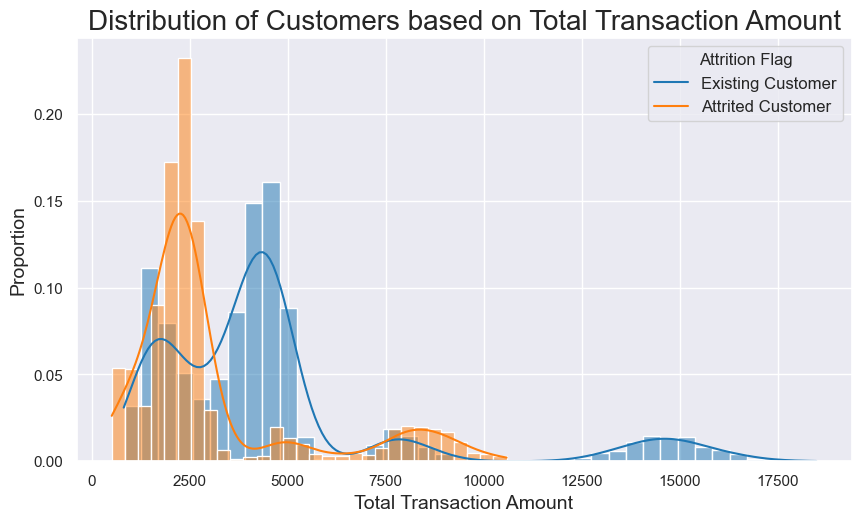

In [12]:
f,axes = plt.subplots(1, 1, figsize=(10,5.5))

graph3 = sns.histplot(data = df[df['Attrition_Flag'] == 'Existing Customer'], 
             x='Total_Trans_Amt', 
             stat='probability',
             ax=axes,
             color = 'tab:blue',
             bins = 40,
             kde =True)
sns.histplot(data=df[df['Attrition_Flag'] == 'Attrited Customer'], 
             x='Total_Trans_Amt', 
             stat='probability', 
             ax=axes, 
             color='tab:orange', 
             bins=30, 
             kde=True).set_title("Distribution of Customers based on Total Transaction Amount", 
                                 fontsize=20)
graph3.set_xlabel('Total Transaction Amount', fontsize=14)
graph3.set_ylabel('Proportion', fontsize=14)
plt.legend(labels=["Existing Customer", "Attrited Customer"], fontsize=12).set_title('Attrition Flag')
plt.show()

The histogram below shows the distribution of existing and attrited customers based on Total Transaction Count.

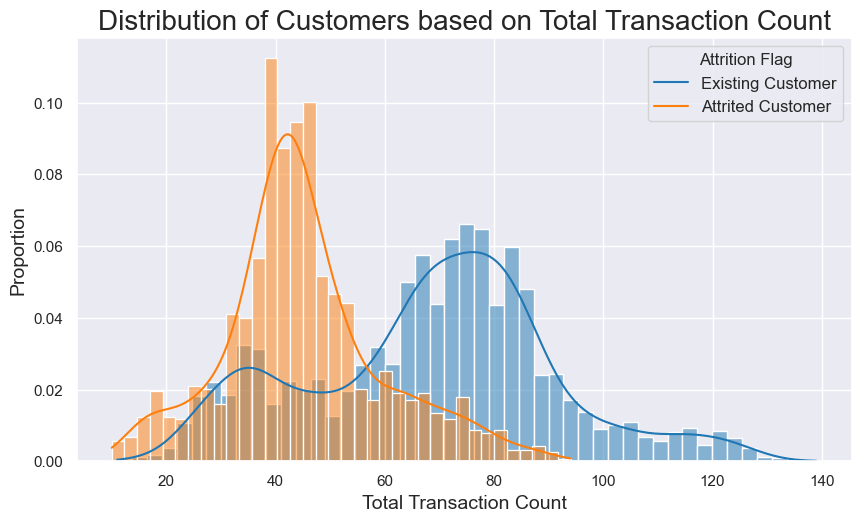

In [13]:
f,axes = plt.subplots(1, 1, figsize=(10, 5.5))

graph4 = sns.histplot(data=df[df['Attrition_Flag'] == 'Existing Customer'], 
                      x='Total_Trans_Ct', 
                      stat='probability',
                      ax=axes,
                      color='tab:blue',
                      kde=True)
sns.histplot(data = df[df['Attrition_Flag'] == 'Attrited Customer'], 
             x='Total_Trans_Ct', 
             stat='probability',
             ax=axes,
             color='tab:orange',
             kde=True).set_title('Distribution of Customers based on Total Transaction Count', 
                                   fontsize=20)

graph4.set_xlabel('Total Transaction Count', fontsize=14)
graph4.set_ylabel('Proportion', fontsize=14)
plt.legend(labels=['Existing Customer', 'Attrited Customer'], fontsize=12).set_title('Attrition Flag')
plt.show()

The histogram below shows the distribution of existing and attrited customers based on Total Count Change.

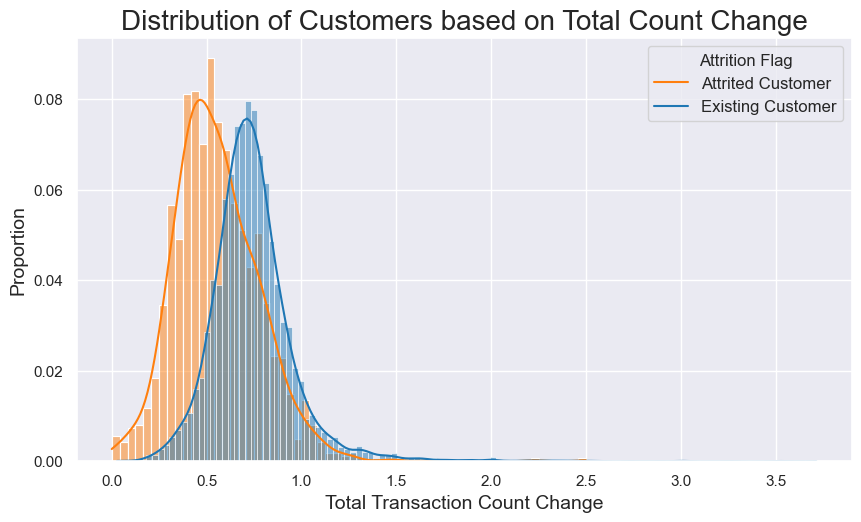

In [14]:
sns.set_theme()
f, axes = plt.subplots(1, 1, figsize=(10,5.5))

graph5 = sns.histplot(data=df[df['Attrition_Flag'] == 'Attrited Customer'], 
                      x='Total_Ct_Chng_Q4_Q1', 
                      stat='probability', 
                      ax=axes, 
                      color='tab:orange', 
                      kde=True, 
                      bins=60)
sns.histplot(data = df[df['Attrition_Flag'] == 'Existing Customer'], 
             x='Total_Ct_Chng_Q4_Q1', 
             stat='probability', 
             ax=axes, 
             color='tab:blue', 
             kde=True, 
             bins=120).set_title('Distribution of Customers based on Total Count Change', 
                                   fontsize=20)

graph5.set_xlabel('Total Transaction Count Change', fontsize=14)
graph5.set_ylabel('Proportion', fontsize=14)
plt.legend(labels=['Attrited Customer','Existing Customer'], fontsize=12).set_title('Attrition Flag')
plt.show()

### 3.2.4 Average Utilisation Ratio

The diverging bar chart below shows the spread of Average Utilisation Ratio for both existing and attrited customers.

In [15]:
step = 0.04

interval = np.arange(0, 1 + step , step)
variable_range = []

for i in interval:
    therange = '{0:0.2f} to {1:0.2f}'.format(i, (i + step))
    if i == 1:
        break
    else:
        variable_range.append(therange)

data1 = df[df['Attrition_Flag'] == 'Attrited Customer']
variable_count1 = []
    
for i in interval:
    subdata = data1[(data1['Avg_Utilization_Ratio'] >= i) & 
                            (data1['Avg_Utilization_Ratio'] <= (i + step))]
    if i == 1:
        break
    else:
        variable_count1.append(subdata.shape[0]/data1.shape[0])  
        
data2 = df[df['Attrition_Flag'] == 'Existing Customer']
variable_count2 = []
    
for i in interval:
    subdata = data2[(data2['Avg_Utilization_Ratio'] >= i) & 
                            (data2['Avg_Utilization_Ratio'] <= (i + step))]
    if i == 1:
        break
    else:
        variable_count2.append(subdata.shape[0]/data2.shape[0])


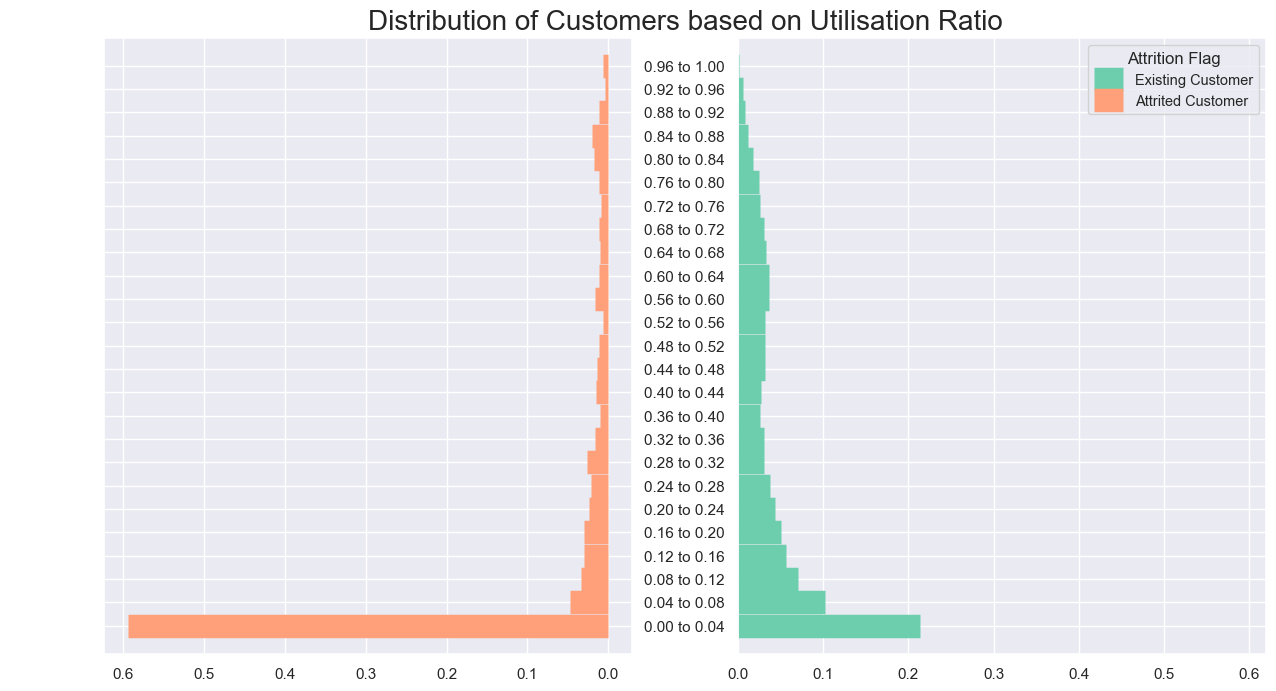

In [16]:
sns.set_theme()
graph, (graph6, graph7) = plt.subplots(1, 2, figsize=(15, 8))

graph6.hlines(y=np.array(variable_range), xmin=0, 
              xmax=np.array(variable_count1),
              colors='lightsalmon', linewidth=16.9)
graph6.invert_xaxis()
graph6.tick_params(axis='y', colors='white')

graph7.hlines(y=np.array(variable_range), xmin=0, 
              xmax=np.array(variable_count2),
              colors='mediumaquamarine', linewidth=16.9, 
              alpha=0.95)
graph7.hlines(y=np.array(variable_range), xmin=0, 
              xmax=0, colors='lightsalmon', linewidth=16.9)

plt.xlim(0,0.62)
plt.title('Distribution of Customers based on Utilisation Ratio', x=-0.1 , fontsize=20)
plt.legend(labels=['Existing Customer','Attrited Customer'], 
           fontsize=10.5).set_title('Attrition Flag')
plt.show()

### 3.2.5 Card Catgory

The stacked bar chart below shows the difference in attrition proportion for the different card categories.

In [17]:
card_cat = ['Blue', 'Silver', 'Gold', 'Platinum']
attri_and_exist_cat = [1,1,1,1]
exist_cat = []

In [18]:
for i in card_cat: 
    
    cat = df.loc[df['Card_Category'] == i]
    existing_cat = cat.loc[cat['Attrition_Flag'] == 'Existing Customer']
    
    existing_cate = existing_cat['Attrition_Flag'].count()
    proportion_count = existing_cate / cat['Attrition_Flag'].count() 
    
    exist_cat.append(proportion_count)

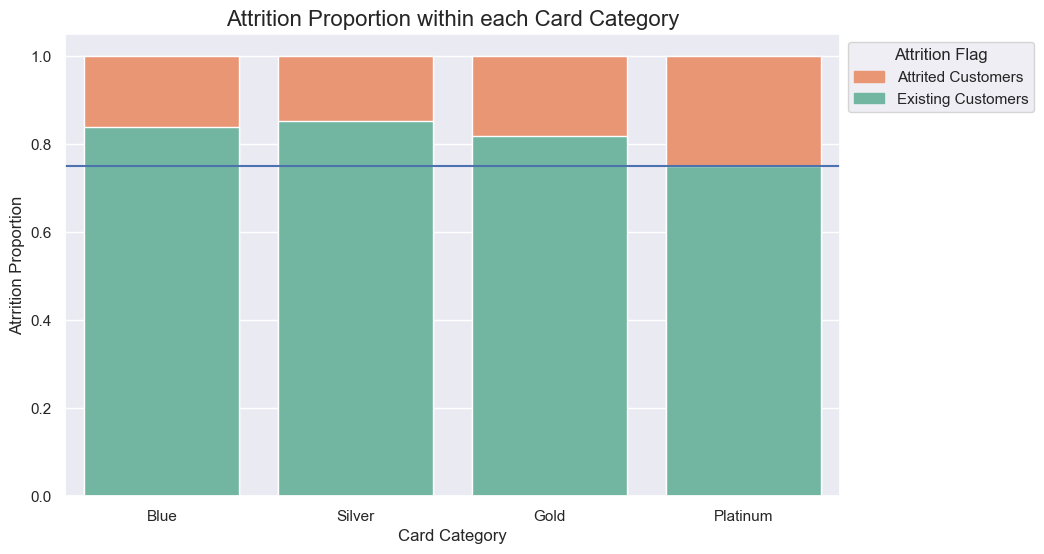

In [19]:
sns.set_theme()
f,axes = plt.subplots(1, 1, figsize=(10,6))

ax = sns.barplot(x=card_cat, y=attri_and_exist_cat, 
                 color='#e99675', saturation=1)
ax = sns.barplot(x=card_cat, y=exist_cat, 
                 color='#72b6a1', saturation=1)

ax.set(xlabel='Card Category', ylabel='Atrrition Proportion')
ax.set_title('Attrition Proportion within each Card Category',
             fontsize=16)
ax.axhline(exist_cat[3])

attrited_patch = mpatches.Patch(color='#e99675', 
                           label='Attrited Customers')
existing_patch = mpatches.Patch(color='#72b6a1', 
                             label='Existing Customers')
plt.legend(handles=[attrited_patch, existing_patch], 
           loc='upper left', bbox_to_anchor=(1, 1), ncol=1).set_title('Attrition Flag')

plt.show()

# 

</br>
</br>

# 4. Model Building

In this section I will train various classifier models to compare their performance. I am rather concerned about the dataset imbalance as the majority of samples in the data represent existing customers. If this imbalance is not fixed, the model may be biased towards predicting non-attrition since it will have a smaller impact on overall accuracy.
</br>
As such, I will first be experimenting with an oversampling technique known as SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic data samples to fix the data imbalance. One downside, however, is that this technique may introduce noise.

In [20]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

## 4.1 Data Preparation

In [21]:
df1 = df.drop(columns = 'CLIENTNUM')

dummy_attrition_flag = pd.get_dummies(df1['Attrition_Flag'], prefix='Attrition_Flag', drop_first=False)
dummy_attrition_flag = dummy_attrition_flag.drop(columns = 'Attrition_Flag_Existing Customer')

df1 = pd.get_dummies(data=df1.drop(columns = 'Attrition_Flag'), drop_first=True)
df1['Attrition_Flag_Attrited Customer'] = dummy_attrition_flag
Y = pd.DataFrame(df1["Attrition_Flag_Attrited Customer"])
X = pd.DataFrame(df1.drop(columns = 'Attrition_Flag_Attrited Customer'))

In [22]:
#Data scaling

from sklearn.preprocessing import MinMaxScaler

to_scale = [col for col in X.columns if X[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(X[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    X[col] = scaled[col]
    
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,...,0,0,0,1,0,0,0,0,0,0
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,...,1,0,0,0,0,1,0,0,0,0
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,...,0,0,0,0,1,0,0,0,0,0
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,...,0,1,0,0,0,1,0,0,0,0
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,...,0,0,0,1,0,0,0,0,0,0


## 4.2.1 Random Forest Modelling without SMOTE

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 16.37
% Positive class in Test  = 15.17


True Positive Rate 		: 0.7630208333333334
True Negative Rate 		: 0.9897579143389199
False Positive Rate 		: 0.010242085661080074
False Negative Rate 		: 0.23697916666666666
Accuracy 			: 0.9553712480252765
Recall 				: 0.7630208333333334


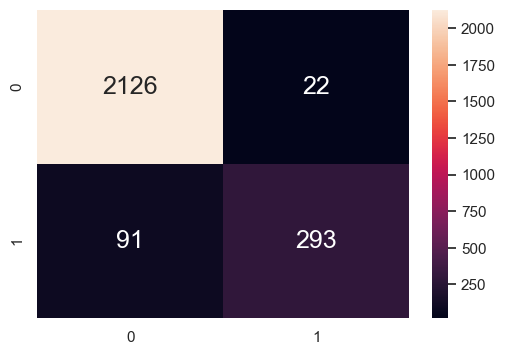

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model1 = RandomForestClassifier(random_state=0)
model1.fit(X_train, y_train.values.ravel())
preds = model1.predict(X_test)

# Evaluate
ConfusionTrain = confusion_matrix(y_test, preds)

FPtrain = ConfusionTrain[0][1]
FNtrain = ConfusionTrain[1][0]
TPtrain = ConfusionTrain[1][1]
TNtrain = ConfusionTrain[0][0]

TPRtrain = TPtrain/(TPtrain+FNtrain)
TNRtrain = TNtrain/(TNtrain+FPtrain) 
FPRtrain = FPtrain/(FPtrain+TNtrain)
FNRtrain = FNtrain/(TPtrain+FNtrain)
ACCtrain = (TPtrain+TNtrain)/(TPtrain+FPtrain+FNtrain+TNtrain)
Recall = recall_score(y_test, preds)


print("True Positive Rate \t\t:", TPRtrain)
print("True Negative Rate \t\t:", TNRtrain)
print("False Positive Rate \t\t:", FPRtrain)
print("False Negative Rate \t\t:", FNRtrain)
print("Accuracy \t\t\t:", ACCtrain)
print("Recall \t\t\t\t:", Recall)


f,axes = plt.subplots(1,1,figsize = (6,4))
sns.heatmap(ConfusionTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
plt.show()

We still get relatively good accuracy of 95%, but the false negative rate is slightly higher than ideal. Let's try using SMOTE to compare the difference in results.

## 4.2.2 Random Forest Modelling with SMOTE

In [27]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7595, 34)
Shape of X after SMOTE: (12704, 34)

Balance of positive and negative classes (%):


Attrition_Flag_Attrited Customer
0                                   50.0
1                                   50.0
dtype: float64

True Positive Rate 		: 0.84375
True Negative Rate 		: 0.9725325884543762
False Positive Rate 		: 0.027467411545623835
False Negative Rate 		: 0.15625
Accuracy 			: 0.9530015797788309
Recall 				: 0.84375


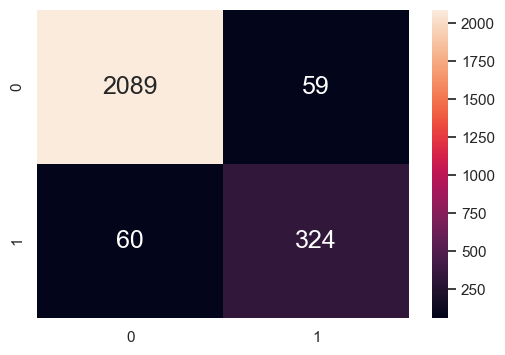

In [28]:
# Train
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_sm, y_sm.values.ravel())
preds = model2.predict(X_test)

# Evaluate
ConfusionTrain = confusion_matrix(y_test, preds)

FPtrain = ConfusionTrain[0][1]
FNtrain = ConfusionTrain[1][0]
TPtrain = ConfusionTrain[1][1]
TNtrain = ConfusionTrain[0][0]

TPRtrain = TPtrain/(TPtrain+FNtrain)
TNRtrain = TNtrain/(TNtrain+FPtrain) 
FPRtrain = FPtrain/(FPtrain+TNtrain)
FNRtrain = FNtrain/(TPtrain+FNtrain)
ACCtrain = (TPtrain+TNtrain)/(TPtrain+FPtrain+FNtrain+TNtrain)
Recall = recall_score(y_test, preds)

print("True Positive Rate \t\t:", TPRtrain)
print("True Negative Rate \t\t:", TNRtrain)
print("False Positive Rate \t\t:", FPRtrain)
print("False Negative Rate \t\t:", FNRtrain)
print("Accuracy \t\t\t:", ACCtrain)
print("Recall \t\t\t\t:", Recall)

f,axes = plt.subplots(1,1,figsize = (6,4))
sns.heatmap(ConfusionTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
plt.show()

### Results
We can see that the false negative rate has gone down quite a bit from 0.24 to 0.15 although the accuracy and recall remained constant. Perhaps the noise introduced by using SMOTE has offset the benefits of removing the imbalance in data.
</br>
These sort of oversampling/undersampling techniques are usually used when the class imbalance is several magnitudes larger, and as we can see from the results, there isn't a very strong case to use SMOTE here. As such, for the rest of the models, I will not be using SMOTE.

## 4.3 Logistic Regression

In [29]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train,y_train.values.ravel())

print(log_primal_Grid.best_score_)    
print(log_primal_Grid.best_params_)
print(log_primal_Grid.best_estimator_)

0.9154725747174259
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, max_iter=250, tol=1e-05)


## 4.4 SVM

In [30]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train.values.ravel())

print(SVM_grid.best_score_)    
print(SVM_grid.best_params_)
print(SVM_grid.best_estimator_)

0.9170512605253571
{'C': 150, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
SVC(C=150, gamma=0.01, probability=True)


## 4.5 Random Forest

In [31]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train,y_train.values.ravel())

print(RanFor_grid.best_score_)    
print(RanFor_grid.best_params_)
print(RanFor_grid.best_estimator_)

0.9528637261356157
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=3)


## 4.6 XGBoost 

In [32]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train,y_train.values.ravel())

print(xgb_grid.best_score_)    
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

0.9719552337063858
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0.01, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


## 4.7 Fitting the best models

In [33]:
def cmatrix_func(model, X_test, y_test):
    preds = model.predict(X_test)

    # Evaluate
    ConfusionTrain = confusion_matrix(y_test, preds)

    FPtrain = ConfusionTrain[0][1]
    FNtrain = ConfusionTrain[1][0]
    TPtrain = ConfusionTrain[1][1]
    TNtrain = ConfusionTrain[0][0]

    TPRtrain = TPtrain/(TPtrain+FNtrain)
    TNRtrain = TNtrain/(TNtrain+FPtrain) 
    FPRtrain = FPtrain/(FPtrain+TNtrain)
    FNRtrain = FNtrain/(TPtrain+FNtrain)
    ACCtrain = (TPtrain+TNtrain)/(TPtrain+FPtrain+FNtrain+TNtrain)
    Recall = recall_score(y_test, preds)

    print("True Positive Rate \t\t:", TPRtrain)
    print("True Negative Rate \t\t:", TNRtrain)
    print("False Positive Rate \t\t:", FPRtrain)
    print("False Negative Rate \t\t:", FNRtrain)
    print("Accuracy \t\t\t:", ACCtrain)
    print("Recall \t\t\t\t:", Recall)

    f,axes = plt.subplots(1,1,figsize = (6,4))
    sns.heatmap(ConfusionTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)
    plt.show()

True Positive Rate 		: 0.6067708333333334
True Negative Rate 		: 0.9613594040968343
False Positive Rate 		: 0.038640595903165736
False Negative Rate 		: 0.3932291666666667
Accuracy 			: 0.9075829383886256
Recall 				: 0.6067708333333334


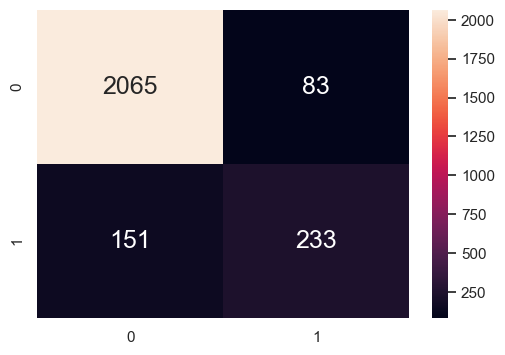

In [34]:
logreg = LogisticRegression(C=50, max_iter=250, tol=1e-05)
logreg.fit(X_train,y_train.values.ravel())

cmatrix_func(logreg, X_test, y_test)

True Positive Rate 		: 0.6302083333333334
True Negative Rate 		: 0.9674115456238361
False Positive Rate 		: 0.032588454376163874
False Negative Rate 		: 0.3697916666666667
Accuracy 			: 0.9162717219589257
Recall 				: 0.6302083333333334


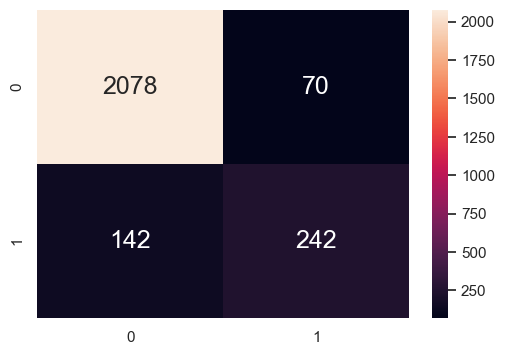

In [35]:
SVM = SVC(C=150, gamma=0.01, probability=True)
SVM.fit(X_train,y_train.values.ravel())
          
cmatrix_func(SVM, X_test, y_test)

True Positive Rate 		: 0.7135416666666666
True Negative Rate 		: 0.9855679702048417
False Positive Rate 		: 0.014432029795158287
False Negative Rate 		: 0.2864583333333333
Accuracy 			: 0.9443127962085308
Recall 				: 0.7135416666666666


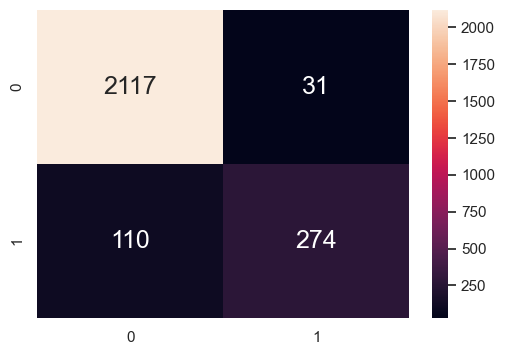

In [36]:
RF = RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=5, n_estimators=50)
RF.fit(X_train,y_train.values.ravel())

cmatrix_func(RF, X_test, y_test)

True Positive Rate 		: 0.8776041666666666
True Negative Rate 		: 0.9911545623836127
False Positive Rate 		: 0.008845437616387336
False Negative Rate 		: 0.12239583333333333
Accuracy 			: 0.9739336492890995
Recall 				: 0.8776041666666666


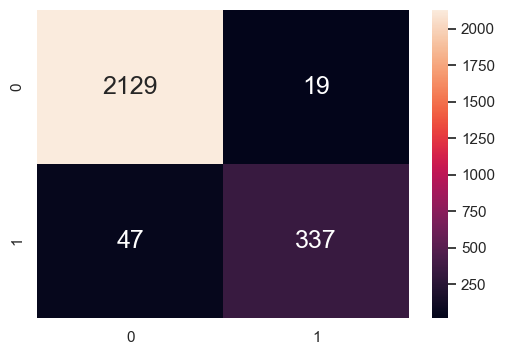

In [37]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0.01, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
XGB.fit(X_train,y_train.values.ravel())

cmatrix_func(XGB, X_test, y_test)

## 4.8 Results

From the confusion matrixes and other metrics, the XGB classifier outperforms all other models by a decent margin, having an overall accuracy of 0.974. However, it fails to pick out around 12% of customers that have attrited. By plotting the ROC (Receiver Operating Characteristic) curve and comparing the AUC for each model (Area Under Curve), we can more accurately determine which model performs best.

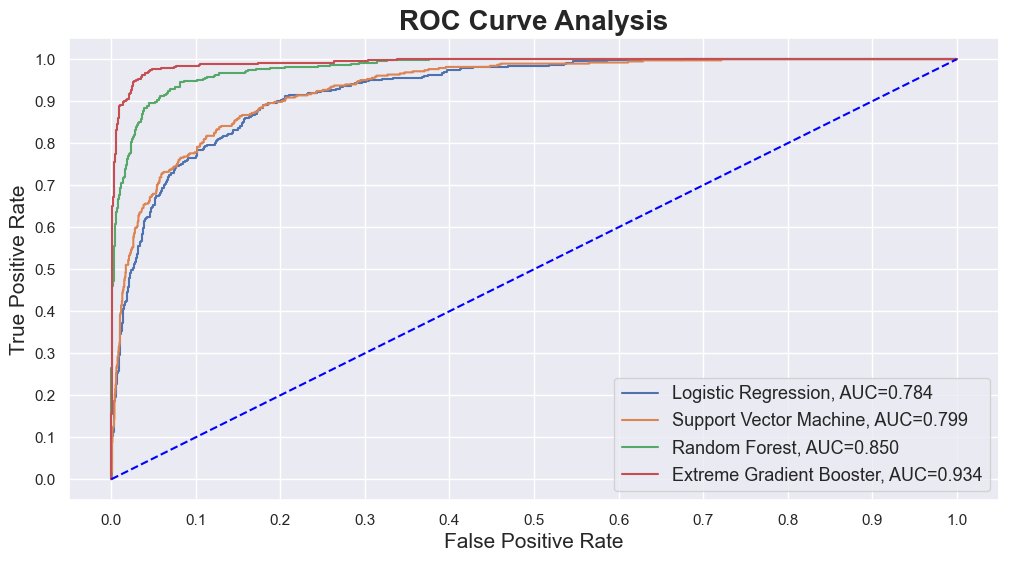

In [38]:
models = [logreg, SVM, RF, XGB]
model_names = ["Logistic Regression", "Support Vector Machine", "Random Forest", "Extreme Gradient Booster"]

plt.figure(figsize = (12,6), linewidth= 1)

for i in range(0, len(models)):
    pred = models[i].predict(X_test)
    y_score = models[i].predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, pred)
    plt.plot(fpr,tpr, label="{}, AUC={:.3f}".format(model_names[i], auc))

plt.legend(prop={'size':13}, loc='lower right')
plt.plot([0,1], [0,1], color='blue', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=20)
plt.show()

In [39]:
print(classification_report(y_test,  XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2148
           1       0.95      0.88      0.91       384

    accuracy                           0.97      2532
   macro avg       0.96      0.93      0.95      2532
weighted avg       0.97      0.97      0.97      2532



Overall, based on the ROC curves and AUC, the XGB Classifier model seems to perform the best with a precision score of 0.95, meaning that out of all customers that the model thinks are/will attrite, 95% of them actually are attrited customers. The model also has a recall score of 0.88, meaning that the model is able to pick out 88% of customers who actually are attrited customers.

# 5. Future work

In this notebook, I went through some EDA as well as modelling for prediction of attrited customers, and built a XGB classifier model with a 97% accuracy that is able to pinpoint which customers will churn. 
</br> </br>
Some future work will include using more advanced models (e.g. Neural Networks) to see if other models will yield better results. Other areas that might be worth looking into might be some more feature processing, as well as trying to pinpoint which features are more important in determining if a customer will churn. Having this information will allow the bank to channel its resources into areas that will produce "better results", so as to speak